Day-12 KNN Algorithm code

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

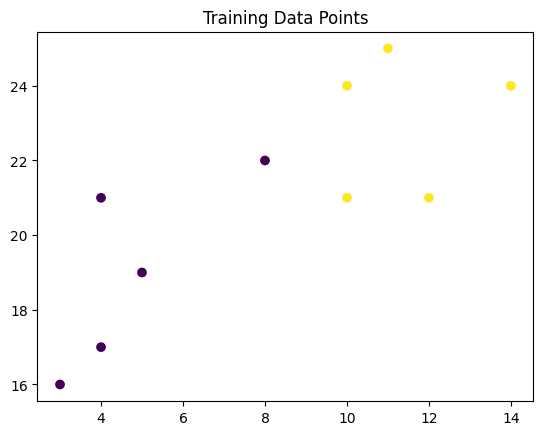

In [2]:
# Sample data
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.title("Training Data Points")
plt.show()


In [3]:
# Fit KNN with k=5
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)

KNeighborsClassifier()

The prediction of class is: [1]


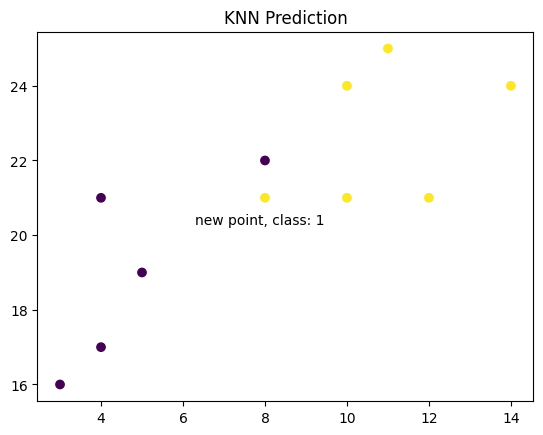

In [4]:
# Predict new point
new_x, new_y = 8, 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print("The prediction of class is:", prediction)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x - 1.7, y=new_y - 0.7, s=f"new point, class: {prediction[0]}")
plt.title("KNN Prediction")
plt.show()

KNN with 3 Classes

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math

In [6]:
# Simulated data
np.random.seed(42)
class_1 = np.column_stack((np.random.normal(2, 0.5, 20), np.random.normal(2, 0.5, 20)))
class_2 = np.column_stack((np.random.normal(5, 0.5, 20), np.random.normal(5, 0.5, 20)))
class_3 = np.column_stack((np.random.normal(2, 0.5, 20), np.random.normal(5, 0.5, 20)))

In [7]:
# Combine and label
X_train = np.vstack([class_1, class_2, class_3])
y_train = np.array([0]*20 + [1]*20 + [2]*20)


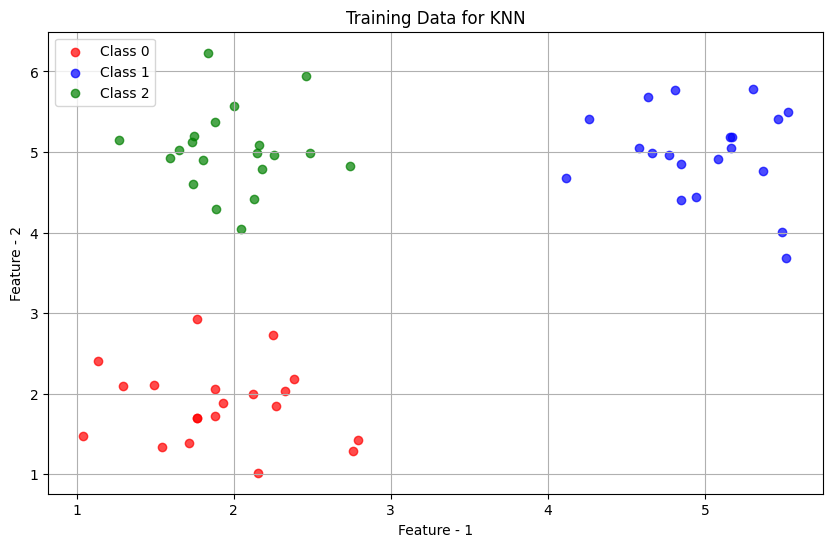

Training data shape: (60, 2)
Training labels shape: (60,)


In [8]:
# Visualize training data
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=colors[i], label=f'Class {i}', alpha=0.7)
plt.xlabel("Feature - 1")
plt.ylabel("Feature - 2")
plt.title("Training Data for KNN")
plt.legend()
plt.grid(True)
plt.show()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")

KNN From Scratch

In [9]:
class KNNFromScratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, point1, point2):
        return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

    def predict_single(self, test_point):
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self.euclidean_distance(test_point, train_point)
            distances.append((dist, self.y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        k_labels = [label for _, label in k_nearest]
        return Counter(k_labels).most_common(1)[0][0]

    def predict(self, X_test):
        return np.array([self.predict_single(point) for point in X_test])

# Train and test
knn = KNNFromScratch(k=3)
knn.fit(X_train, y_train)

test_points = np.array([[1.5, 1.5], [4.5, 4.5], [2.5, 4.5]])
predictions = knn.predict(test_points)

print("Test points and predictions")
for i, (point, pred) in enumerate(zip(test_points, predictions)):
    print(f"Point {point} -> Predicted Class: {pred}")

Test points and predictions
Point [1.5 1.5] -> Predicted Class: 0
Point [4.5 4.5] -> Predicted Class: 1
Point [2.5 4.5] -> Predicted Class: 2


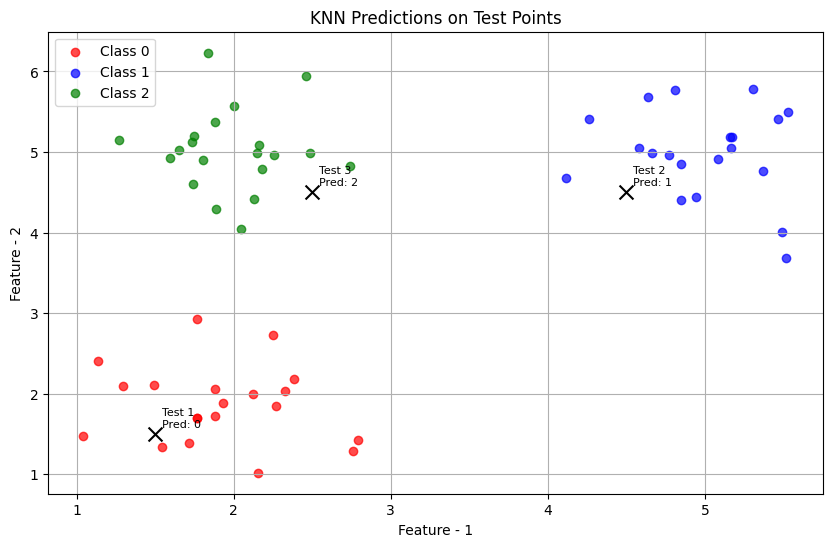

In [10]:
# Visualize predictions
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=colors[i], label=f'Class {i}', alpha=0.7)

for i, (point, pred) in enumerate(zip(test_points, predictions)):
    plt.scatter(point[0], point[1], c='black', marker='x', s=100)
    plt.annotate(f'Test {i+1}\nPred: {pred}', xy=(point[0], point[1]), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Feature - 1')
plt.ylabel('Feature - 2')
plt.title('KNN Predictions on Test Points')
plt.legend()
plt.grid(True)
plt.show()